<a href="https://colab.research.google.com/github/sir-sauc3/comp215-Project1/blob/main/Trial_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from dataclasses import dataclass
from pprint import pprint
import random
from scipy.signal import correlate2d

import time

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib.colors as colors

In [2]:
DEFAULT_IMSHOW_OPTIONS = dict(
    cmap='Blues',
    interpolation='none',
    origin='upper',
)


def plot_2D_array(array, axes=None, title='', **options):
    """ Plot the 2D array as an image on the given axes  1's will be dark blue, 0's will be light blue. """
    axes = axes or plt.gca()  # If not axes are provided, draw on current axes
    axes.set_title(title)
    axes.set_xticks([], [])  # remove axes tick marks
    axes.set_yticks([], [])
    options = {**DEFAULT_IMSHOW_OPTIONS, **options}
    axes.imshow(array, **options)

In [3]:
class Animation2D:
    """
      Animates any 2D model with a step() method and a draw() method, using matplotlib
      model.step() should take no parameters - just step the model forward one step.
      model.draw() should take 2 parameters, the matpltolib axes to draw on and an integer step number

      See https://www.allendowney.com/blog/2019/07/25/matplotlib-animation-in-jupyter/
          for a discussion of the pros and cons of various animation techniques in jupyter notebooks
    """

    def __init__(self, model, frames=100, steps_per_frame=1, figsize=(10, 10)):
        """
        :param model: the simulation object to animate, with step() and draw(axes, step) methods
        :param frames: number of animation frames to generate
        """
        self.model = model
        self.frames = frames
        self.steps_per_frame = steps_per_frame
        self.fig, self.ax = plt.subplots(figsize=figsize)

    def animation_step(self, step):
        """ Step the model forward and draw the plot """
        if step > 0:
            for _ in range(self.steps_per_frame):
                self.model.step()
        self.model.draw(self.ax, step=step * self.steps_per_frame)

    def show(self):
        """ return the matplotlib animation object, ready for display """
        anim = animation.FuncAnimation(self.fig, self.animation_step, frames=self.frames)
        plt.close()  # this ensures the last frame is not shown as a separate plot
        return anim

    def animate(self, interval=None):
        """ Animate the model simulation directly in the notebook display block """
        from IPython.display import clear_output
        try:
            for i in range(self.frames):
                clear_output(wait=True)  # clear the IPython display
                self.ax.clear()          # clear old image from the axes (fixes a performance issue)
                plt.figure(self.fig)     # add the figure back to pyplot ** sigh **
                self.animation_step(i)
                plt.show()               # show the current animation frame (pyplot then closes and throws away figure ** sigh **)
                if interval:
                    time.sleep(interval)
        except KeyboardInterrupt:
            pass

In [20]:
class Deer:
  NONEXISTENT = 0
  DEATHWEIGHT = 3
  W : int
  M : int
  metabolism : int
  x : int
  y : int
  
  def __init__(self, M, W, metabolism):
    self.M = M
    self.W = W
    self.metabolism = metabolism

  def loseWeight(self):
    self.W -= self.metabolism

  def gainWeight(self):
    self.W += self.metabolism
  
  def __str__(self):
    return W

  # def __init__(self):
  #   # self.loc = tuple(loc)

  #   weight = 20
  #   max_weight = 60
  #   metabolism = 5

  
  # def step():
  #   #make a random cardinal movement
  #   #graze if grass is there
  #   #increase weight if deer grazed or decrease weight if deer didnt graze
  #   return


def random_walk(n):
  x,y = 0,0

  for i in range(n):
    dx, dy = random.choice([(1,0), (-1,0), (0,1), (0,-1)])
    x+=dx
    y+=dy

  return((x, y))

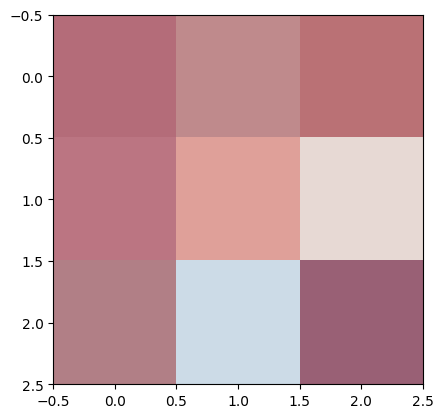

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create two NumPy arrays of the same size
arr1 = np.random.rand(3, 3)
arr2 = np.random.rand(3, 3)

# Display the arrays over each other using imshow
fig, ax = plt.subplots()
ax.imshow(arr1, cmap='Blues', alpha=0.5)
ax.imshow(arr2, cmap='Reds', alpha=0.5)
plt.show()

[[0.69503439 0.68317668 0.40355748]
 [0.22024327 0.76717784 0.78889644]
 [0.44098394 0.28602882 0.98081712]]


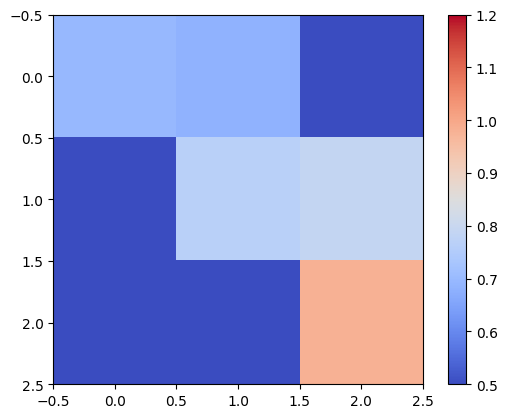

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 3x3 NumPy array with random values
arr = np.random.rand(3, 3)

print(arr)
# Display the array using a custom colormap
fig, ax = plt.subplots()
im = ax.imshow(arr, cmap='coolwarm', vmin=0.5, vmax=1.2)

# Add a colorbar to show the mapping of values to colors
cbar = ax.figure.colorbar(im, ax=ax)

# Show the plot
plt.show()

[[ 0.85932683  1.41861906  1.87311873]
 [ 1.68981506 -0.83276309  0.62526954]
 [-0.03218486  0.06227593 -0.69264417]]


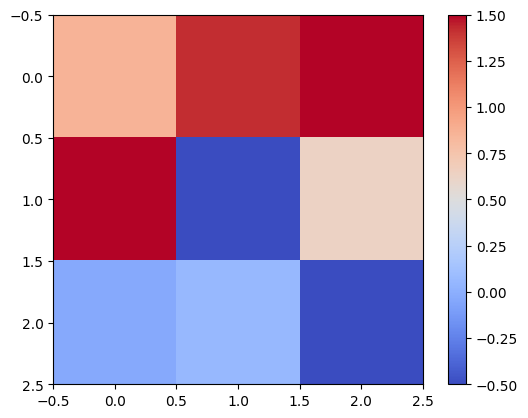

In [7]:
import numpy as np

arr = np.random.uniform(low=-1, high=2, size=(3, 3))

print(arr)
fig, ax = plt.subplots()
im = ax.imshow(arr, cmap='coolwarm', vmin=-0.5, vmax=1.5)

# Add a colorbar to show the mapping of values to colors
cbar = ax.figure.colorbar(im, ax=ax)

# Show the plot
plt.show()

In [34]:
class Grazing_sim:

  kernel = np.array([[0, 1, 0],
                     [1, 0, 1],
                     [0, 1, 0]])

  # i created 3 arrays: grassland, init_deer_location, field
  # grassland just randomizes the grass coverage
  # init_deer_location is an array of the same shape that only has 0s and 3s; 3s meaning they have deer there
  # field puts the two together where the 3s in init_deer_location take precedence and replace any 0s and 1s in the grassland array
  def __init__(self, size, deer_amt, q):
    self.size = size
    self.deer_amt = deer_amt
    self.q = q
    
    self.grassland = np.random.choice([1, 0], (self.size,self.size), p=(q, 1-q))
    _ = np.random.choice(self.size**2, size=deer_amt, replace=False)
    # creates a 1D array. param 1 is the size the 1D array should be - which equals the total number of cells in grassland
    # then it picks size=deer_amt random indexes to put the deer
    # replace=False in this case means that it wouldn't pick an index it already picked
    # the random indexes picked are collected in _

    x, y = np.unravel_index(_, (self.size, self.size)) 
    # unravel_index first makes a size by size 2D array then returns the coordinates of the indexes in _
    # it returns two arrays; the x coordintes in one array, and the y coordintes in another

    init_deer_location = np.zeros((self.size,self.size), dtype=object) #changed matrix to dtype=object, rather than just float objects only
    init_deer_location[x,y] = Deer(60,20,5) #now adds a Deer object rather than the default 3 value we had before
    # here's where the actual inital deer location array is made
    # it creates an array of all zeros (same size as grassland)
    # then takes the coordinates from the returned coordinate arrays and replaces the 0s with 3s

    # print(self.one)
    # correlated_matrix = correlate2d(self.one, self.kernel, mode='same', boundary='wrap')
    # print('\n')
    # print(correlated_matrix)

    self.field = np.where(isinstance(init_deer_location, Deer), init_deer_location, self.grassland).astype(int) #checks for if Deer type, rather than 3 value
    # field is a mix of both arrays
    # param1 sets precedence, param2 indicates which arary is on the top, param3 indicates whic array is on the bottom
    # .astype(int) just removes the decimal points that it puts on the numbers for some reason
    # print(self.three)

    '''
    if statement @37 
    self.grassfield = 1:
    self.field = np.where(init_deer_location==4, init_deer_location, self.grassland).astype(int)
    '''



  def move_to(self, current_pos):
    # Get neighboring cells of current position

    occupied = [(x,y) for x,y in zip(np.where(self.field==3)[0], np.where(self.field==3)[1])]
    correlated_matrix = correlate2d(self.grassland, self.kernel, mode='same', boundary='wrap')
    
    neighbors = [(current_pos[0]+i, current_pos[1]+j) 
                  if (current_pos[0]+i < correlated_matrix.shape[0]) and (current_pos[1]+j < correlated_matrix.shape[1])
                  else correlated_matrix[0, current_pos[1]+j] if (current_pos[0]+i >= correlated_matrix.shape[0])
                  else correlated_matrix[current_pos[1]+i, 0] if (current_pos[1]+j >= correlated_matrix.shape[1])
                  else 0
                  for i in [-1, 1] for j in [-1, 1] 
                 ]

    # Check if the cell where the deer is moving contains a value of 1
    # Check if the cell where the deer is moving contains a value of 1
    if isinstance(self.field[current_pos], Deer) and self.field[best_neighbor] == 1:
        # Run code to make the deer gain weight
        deer_index = occupied.index(current_pos)
        deer = self.deers[deer_index]
        deer.gainWeight()
    elif isinstance(self.field[current_pos], Deer):
        # Run code to make the deer lose weight
        deer_index = occupied.index(current_pos)
        deer = self.deers[deer_index]
        deer.loseWeight()


    
    # Remove occupied cells from list of available neighbors
    available_neighbors = [n for n in neighbors if n not in occupied and self.field[n] != 3]
    
    # If all neighbors are occupied, stay in current position
    if len(available_neighbors) == 0:
        return current_pos
    
    # Calculate values of neighboring cells in correlated matrix
    # neighbor_values = [correlated_matrix[n] 
    #                    for n in available_neighbors 
    #                    if (0 <= n[0] < correlated_matrix.shape[0]) and (0 <= n[1] < correlated_matrix.shape[1])]
    neighbor_values = [
                   correlated_matrix[n] if (n[0] < correlated_matrix.shape[0] and n[1] < correlated_matrix.shape[1])
                   else correlated_matrix[0, n[1]] if (n[0] >= correlated_matrix.shape[0])
                   else correlated_matrix[n[0], 0] if (n[1] >= correlated_matrix.shape[1])
                   else 0
                   for n in neighbors]
    
    # Get index of neighboring cell with highest value
    best_neighbor_index = np.argmax(neighbor_values)
    
    # Choose the best neighboring cell to move to
    best_neighbor = available_neighbors[best_neighbor_index]
    
    return best_neighbor





  # def draw(self, fig=None, ax=None):
  #       if fig is None and ax is None:
  #           # if fig and ax are not provided, create them
  #           fig, ax = plt.subplots()
  #       # do your plotting here using the fig and ax objects
        
  #       return fig, ax






  def draw(self, fig=None, axes=None):
    fig, ax = plt.subplots()
    cmap = [(225/225, 248/255, 220/255),(0,1,0),(0,0,0),(165/255, 42/255, 42/255)]
    field_color_map = matplotlib.colors.ListedColormap(cmap)
    ax.imshow(self.field, cmap=field_color_map, vmin=0, vmax=3)

    # create a title for the plot
    ax.set_title(f"Grazing Simulation, step {self.step}")

    # draw the field
    ax.imshow(self.field, cmap=cmap, vmin=0, vmax=3)
    
    # show the plot
    plt.show()


# print(one)
# print(two)

# deer_loc = two==3
# print(deer_loc)


In [25]:
q = 0.5
size = 20
deer_amt = 5

test = Grazing_sim(size, deer_amt, q)

loc = test.field[test.field==3]
# print(loc)

# coord = [position.location for position in loc]
# test.draw()

# run = Animation2D(test)
# run.animate()

In [26]:
# for i in zip(np.where(test.field==3)[0], np.where(test.field==3)[1]):
#   print(i)


occupied = [(x,y) for x,y in zip(np.where(test.field==3)[0], np.where(test.field==3)[1])]
print(occupied)

[]


In [27]:
# Define your kernel k here
k = np.array([[0, 1, 0],
              [1, 0, 1],
              [0, 1, 0]])

q = 0.3
size = 5
num = 3
M = np.random.choice([0,1], (size,size), p=(q, 1-q))
two = np.random.choice(size**2, size=3, replace=False)
print(two)
(x, y) = np.unravel_index(two, (size, size))
# occ_loc = [(x,y) for x,y in np.unravel_index(two, (size, size))]
two = np.zeros((size,size))
print(x,y)
for xy in zip(x,y):
  print(xy)
two[x,y] = 3
print(two)
three = np.where(two==3, two, M).astype(int)

# Calculate the correlated matrix C
C = correlate2d(M, k, mode='same', boundary='wrap')
# correlate2d(self.one, self.kernel, mode='same', boundary='wrap')

# Define a function to get the highest value neighbor given a cell index
def get_highest_neighbor(cell_idx):
    i, j = cell_idx
    neighbors = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)] # cardinal neighbors
    neighbor_values = [C[n] for n in neighbors if (0 <= n[0] < C.shape[0]) and (0 <= n[1] < C.shape[1])] # get neighbor values
    if len(neighbor_values) > 0:
        highest_neighbor = neighbors[np.argmax(neighbor_values)]
    else:
        highest_neighbor = cell_idx # stay put if no neighbors
    return highest_neighbor

# Move agents based on highest value neighbor
# for agent in A:
#     current_location = agent.location
#     highest_neighbor = get_highest_neighbor(current_location)
#     agent.move_to(highest_neighbor)



[13  4 16]
[2 0 3] [3 4 1]
(2, 3)
(0, 4)
(3, 1)
[[0. 0. 0. 0. 3.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0.]
 [0. 3. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [28]:
print('field\n')
print(M)
print('\n\nfield with deer\n')
print(three)
print('\n\ncorrelated field\n')
print(C)

unoccupied = three<3
print('\n\ncells with no deer\n')
print(unoccupied)
print('\n')


i=2
j=2


print(f'the value of C[{i},{j}] is {C[i,j]}\n')


neighbors = [(i-1, j), (i, j+1), (i+1, j), (i, j-1)] #up, right, down, left
neighbor_values = [C[n] for n in neighbors if (0 <= n[0] < C.shape[0]) and (0 <= n[1] < C.shape[1])]
neighbor_values = [
                   C[n] if (n[0] < C.shape[0] and n[1] < C.shape[1])
                   else C[0, n[1]] if (n[0] >= C.shape[0])
                   else C[n[0], 0] if (n[1] >= C.shape[1])
                   else 0
                   for n in neighbors]



print(f'The neighbor values of i={i} and j={j} are {neighbor_values}\nAnd the index of the highest neighbor is {np.argmax(neighbor_values)}')

# for ji in neighbors:
#   print(f'ji[0] = {ji[0]}\tji[1] = {ji[1]}\tC.shape[0] = {C.shape[0]}\tC.shape[1] = {C.shape[1]}')
#   print(ji[0] < C.shape[0] and ji[1] < C.shape[1])
# print(C.shape)

# (y,x) = np.where(M == 1)

# print(y,x)

# print(get_highest_neighbor((3,1)))

field

[[0 1 1 1 1]
 [0 1 0 1 0]
 [0 1 1 0 1]
 [0 0 1 0 1]
 [1 0 1 1 1]]


field with deer

[[0 1 1 1 3]
 [0 1 0 1 0]
 [0 1 1 3 1]
 [0 3 1 0 1]
 [1 0 1 1 1]]


correlated field

[[3 2 3 4 2]
 [1 2 4 1 3]
 [2 2 2 3 1]
 [2 2 2 3 2]
 [1 3 3 3 4]]


cells with no deer

[[ True  True  True  True False]
 [ True  True  True  True  True]
 [ True  True  True False  True]
 [ True False  True  True  True]
 [ True  True  True  True  True]]


the value of C[2,2] is 2

The neighbor values of i=2 and j=2 are [4, 3, 2, 2]
And the index of the highest neighbor is 0


In [29]:
'''
Probably want to use a kernel to tell the value of the neighboring cells
When a deer 'sees' that theres's a cell with a value of 1, it moves there

choosinng a cell to move to
1. make a chek_if_occupied_neighborhood function that checks if there are other deer in its cardinal neighbors
'''

"\nProbably want to use a kernel to tell the value of the neighboring cells\nWhen a deer 'sees' that theres's a cell with a value of 1, it moves there\n\nchoosinng a cell to move to\n1. make a chek_if_occupied_neighborhood function that checks if there are other deer in its cardinal neighbors\n"

In [30]:
import numpy as np

# Create the first array with 0s and 1s
arr1 = np.array([[1, 0, 1],
                 [0, 1, 0],
                 [1, 1, 0]])

# Create the second array with 0s and 3s
arr2 = np.array([[0, 0, 0],
                 [3, 3, 0],
                 [0, 0, 3]])

# Create the third array by combining the first and second arrays
arr3 = np.where(arr2 == 3, arr2, arr1)

# Print the arrays to check the result
print("Array 1:\n", arr1)
print("Array 2:\n", arr2)
print("Array 3:\n", arr3)

Array 1:
 [[1 0 1]
 [0 1 0]
 [1 1 0]]
Array 2:
 [[0 0 0]
 [3 3 0]
 [0 0 3]]
Array 3:
 [[1 0 1]
 [3 3 0]
 [1 1 3]]
